In [1]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
!pip install torchvision==0.18.1

   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.2 MB 435.7 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.2 MB 880.9 kB/s eta 0:00:02
   ----------- ---------------------------- 0.3/1.2 MB 2.1 MB/s eta 0:00:01
   ---------------------------- ----------- 0.8/1.2 MB 3.8 MB/s eta 0:00:01
   ---------------------------------------  1.2/1.2 MB 5.0 MB/s eta 0:00:01
   ---------------------------------------  1.2/1.2 MB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 3.8 MB/s eta 0:00:00
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.19.0
    Uninstalling torchvision-0.19.0:
      Successfully uninstalled torchvision-0.19.0


In [5]:
import os
import random

from ultralytics import YOLO
import cv2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image


In [2]:
train_images = r"./train/images"

train_labels = r"./train/labels"

In [3]:
train_images

'./train/images'

In [4]:
train_labels

'./train/labels'

In [6]:
train_path = './train/images'
val_path = './valid/images'

print("Train directory exists:", os.path.exists(train_path))
print("Val directory exists:", os.path.exists(val_path))

Train directory exists: True
Val directory exists: True


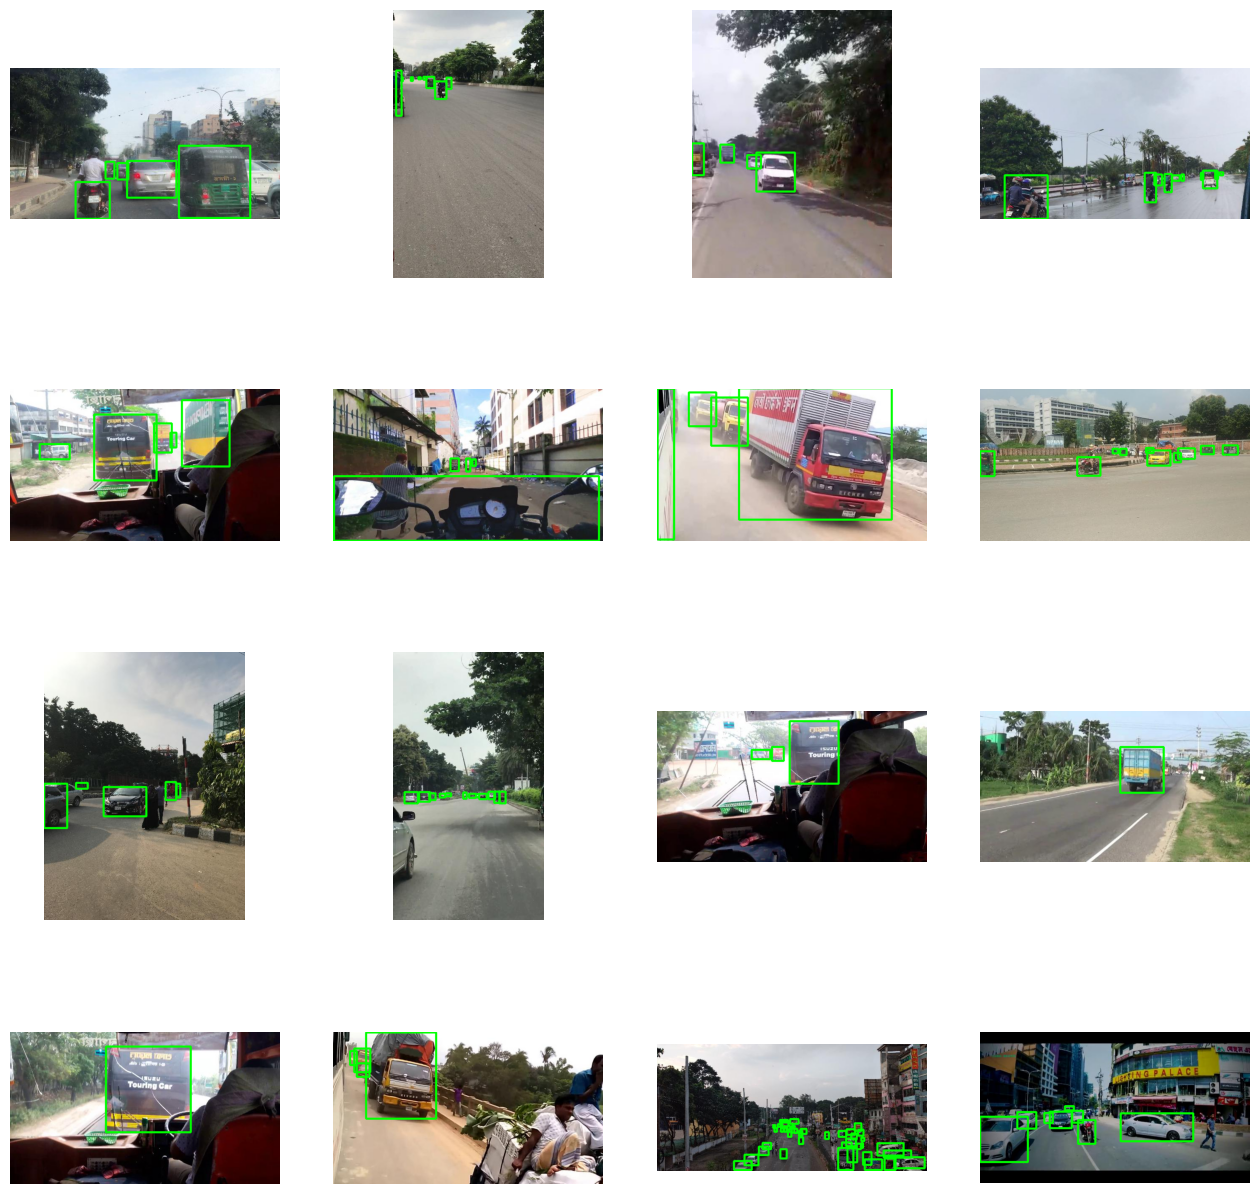

In [7]:
def load_labels(image_file, train_labels):
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)

    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    return labels

def plot_object_detections(ax, image, labels):
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)

    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.axis('off')

# Set paths
train_images = "./train/images"
train_labels = "./train/labels"
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row, col = divmod(i, 4)

    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    labels = load_labels(image_file, train_labels)

    # Plot object detections
    plot_object_detections(axs[row, col], image, labels)

plt.show()



In [8]:
with open('data_1.yaml', 'r') as f:

    data = f.read()

print(data)


train: C:/Users/WGRACY.ai/Desktop/Ramya/train/images
val: C:/Users/WGRACY.ai/Desktop/Ramya/valid/images

nc: 21
names: ['ambulance', 'army vehicle', 'auto rickshaw', 'bicycle', 'bus', 'car', 'garbagevan', 'human hauler', 'minibus', 'minivan', 'motorbike', 'pickup', 'policecar', 'rickshaw', 'scooter', 'suv', 'taxi', 'three wheelers -CNG-', 'truck', 'van', 'wheelbarrow']



In [9]:
h, w, c = image.shape

print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 640x359 and 3 channels.



image 1/1 C:\Users\WGRACY.ai\Desktop\Ramya\train\images\Navid_683_jpg.rf.a972c718d70e4d43a06bc5bad469e9e8.jpg: 256x416 2 persons, 6 cars, 2 motorcycles, 194.7ms
Speed: 3.2ms preprocess, 194.7ms inference, 619.8ms postprocess per image at shape (1, 3, 256, 416)


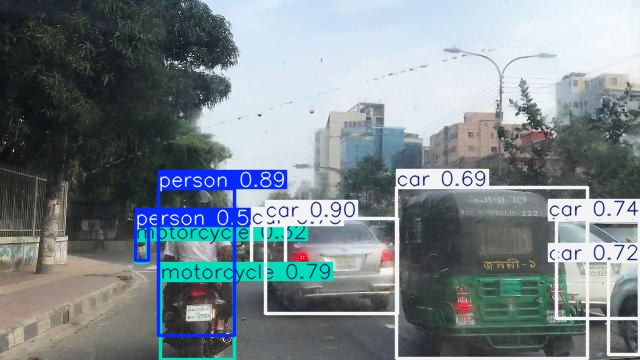

In [10]:
model = YOLO("yolov8x.pt")

result_predict = model.predict(source = os.path.join(train_images, random_images[0]), imgsz=(416))

plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))


0: 256x416 2 persons, 6 cars, 2 motorcycles, 21.5ms
Speed: 0.0ms preprocess, 21.5ms inference, 12.8ms postprocess per image at shape (1, 3, 256, 416)

0: 416x256 1 person, 1 car, 1 motorcycle, 2 trucks, 148.0ms
Speed: 2.0ms preprocess, 148.0ms inference, 3.1ms postprocess per image at shape (1, 3, 416, 256)

0: 416x320 3 cars, 3 trucks, 177.0ms
Speed: 0.0ms preprocess, 177.0ms inference, 0.0ms postprocess per image at shape (1, 3, 416, 320)

0: 256x416 5 persons, 1 car, 3 motorcycles, 1 truck, 28.9ms
Speed: 0.0ms preprocess, 28.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 person, 1 car, 3 buss, 1 truck, 1 chair, 16.5ms
Speed: 2.0ms preprocess, 16.5ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 3 persons, 1 motorcycle, 17.6ms
Speed: 5.0ms preprocess, 17.6ms inference, 2.8ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 person, 1 bus, 3 trucks, 21.9ms
Speed: 13.9ms preprocess, 21.9ms inference, 3.0ms 

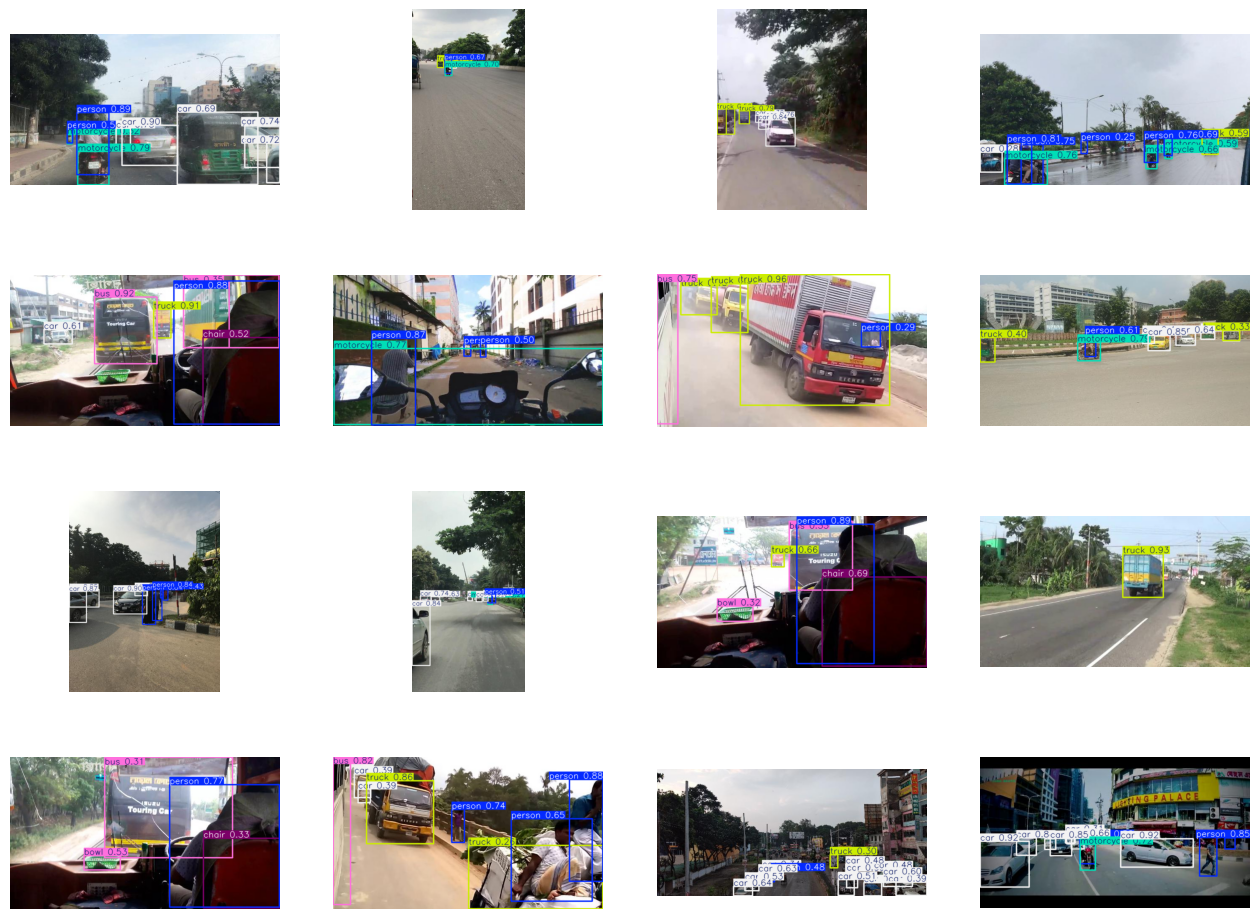

In [11]:
fig, axs = plt.subplots(4, 4, figsize = (16, 12))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row, col = divmod(i, 4)

    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    result_predict = model.predict(image, imgsz=(416))

    plot = result_predict[0].plot()
    plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)

    axs[row,col].imshow(plot)
    axs[row,col].axis('off')

plt.show()

In [12]:
model = YOLO('yolov8x.pt')

In [13]:
model


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 80, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(80, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(80, 160, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(160, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(160, 160, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(160, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(400, 160, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(160, eps=0.001, momentum=0.03, affine=True, track_r

In [14]:
model.train(data = './data_1.yaml',
            epochs = 30,
            imgsz = h,
            seed = 42,
            batch = 8,
            workers = 4)

New https://pypi.org/project/ultralytics/8.2.76 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.75  Python-3.9.19 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4070 Ti, 12282MiB)
engine\trainer: task=detect, mode=train, model=yolov8x.pt, data=./data_1.yaml, epochs=30, time=None, patience=100, batch=8, imgsz=359, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train19, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, sav

train: Scanning C:\Users\WGRACY.ai\Desktop\Ramya\train\labels.cache... 2704 images, 2 backgrounds, 0 corrupt: 100%|████
val: Scanning C:\Users\WGRACY.ai\Desktop\Ramya\valid\labels.cache... 300 images, 0 backgrounds, 0 corrupt: 100%|███████

val: WARNING  C:\Users\WGRACY.ai\Desktop\Ramya\valid\images\Pias--359-_PNG.rf.43bcf36efe5cf8c37552d2c45fffea60.jpg: 9 duplicate labels removed
val: WARNING  C:\Users\WGRACY.ai\Desktop\Ramya\valid\images\Pias--360-_PNG.rf.8405b0e44009a9300e0a1100ccf7d5b3.jpg: 7 duplicate labels removed


Plotting labels to runs\detect\train19\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0004, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 384 train, 384 val
Using 4 dataloader workers
Logging results to runs\detect\train19
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      4.51G      1.278      1.793      1.098        134        384: 100%|██████████| 338/338 [01:07<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03

                   all        300       2568      0.507      0.272      0.227      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      3.87G      1.304      1.446      1.135         57        384: 100%|██████████| 338/338 [00:56<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03


                   all        300       2568      0.617      0.242      0.276      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      3.83G      1.357      1.446      1.173        117        384: 100%|██████████| 338/338 [00:54<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02

                   all        300       2568       0.53      0.259      0.276      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      3.84G      1.345      1.396      1.158         74        384: 100%|██████████| 338/338 [00:54<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02


                   all        300       2568      0.589      0.305      0.304      0.172

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      3.86G      1.298      1.303      1.141        129        384: 100%|██████████| 338/338 [00:54<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03


                   all        300       2568      0.599      0.317      0.334      0.194

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      3.86G      1.275      1.241      1.124         81        384: 100%|██████████| 338/338 [00:53<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02

                   all        300       2568      0.492      0.299      0.312      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      3.93G      1.255      1.206      1.111         92        384: 100%|██████████| 338/338 [00:53<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02

                   all        300       2568       0.54      0.369      0.343      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      3.84G      1.249      1.175      1.109        141        384: 100%|██████████| 338/338 [00:53<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02

                   all        300       2568      0.642       0.35       0.39      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      3.86G      1.208        1.1      1.085        165        384: 100%|██████████| 338/338 [00:54<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02

                   all        300       2568      0.612       0.35      0.371      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      3.87G       1.19      1.072       1.08         65        384: 100%|██████████| 338/338 [00:54<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02

                   all        300       2568      0.624      0.372      0.403      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      3.89G      1.182      1.028      1.071        154        384: 100%|██████████| 338/338 [00:53<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02


                   all        300       2568      0.482      0.425      0.376      0.214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      3.83G       1.16      1.018       1.07        107        384: 100%|██████████| 338/338 [00:54<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02

                   all        300       2568       0.57      0.377       0.39      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      3.84G      1.143     0.9703      1.058         95        384: 100%|██████████| 338/338 [00:54<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02

                   all        300       2568      0.646      0.374      0.397       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      3.85G      1.116     0.9351      1.044        133        384: 100%|██████████| 338/338 [00:54<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02

                   all        300       2568       0.65      0.367        0.4      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      3.89G      1.111     0.9167      1.041        102        384: 100%|██████████| 338/338 [00:54<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02


                   all        300       2568      0.653      0.392      0.401      0.244

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      3.84G      1.093     0.8839      1.037        145        384: 100%|██████████| 338/338 [00:54<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02

                   all        300       2568      0.556      0.411      0.394      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      3.86G      1.066     0.8573      1.029        102        384: 100%|██████████| 338/338 [00:54<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03

                   all        300       2568        0.6      0.399      0.436       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      3.85G      1.071     0.8514       1.03        186        384: 100%|██████████| 338/338 [00:54<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02

                   all        300       2568      0.695      0.358      0.493      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      3.84G      1.043     0.8134       1.01         96        384: 100%|██████████| 338/338 [00:54<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02

                   all        300       2568      0.676      0.374      0.414      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      3.88G      1.034     0.7899       1.01        108        384: 100%|██████████| 338/338 [00:54<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02

                   all        300       2568      0.537      0.432      0.446      0.265


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      3.89G      1.024     0.7327     0.9967         50        384: 100%|██████████| 338/338 [00:54<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03


                   all        300       2568      0.678      0.399      0.411       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      3.86G      1.009     0.7125     0.9852         51        384: 100%|██████████| 338/338 [00:54<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02

                   all        300       2568      0.609      0.414      0.433      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      3.84G     0.9945     0.6866     0.9787         48        384: 100%|██████████| 338/338 [00:54<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02

                   all        300       2568       0.58      0.422      0.481      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      3.85G     0.9746     0.6569     0.9679         67        384: 100%|██████████| 338/338 [00:54<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02

                   all        300       2568      0.514      0.519      0.484      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      3.84G     0.9609     0.6453     0.9631         70        384: 100%|██████████| 338/338 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02

                   all        300       2568      0.448      0.518      0.489      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      3.84G     0.9422      0.625     0.9624         88        384: 100%|██████████| 338/338 [00:54<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02

                   all        300       2568      0.636      0.421       0.47      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      3.84G     0.9246     0.6013     0.9536        177        384: 100%|██████████| 338/338 [00:53<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02

                   all        300       2568      0.627      0.453       0.47      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      3.84G     0.9165     0.5807      0.946         50        384: 100%|██████████| 338/338 [00:55<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02

                   all        300       2568      0.616      0.528      0.515      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      3.84G     0.9046     0.5661     0.9458         42        384: 100%|██████████| 338/338 [00:55<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02

                   all        300       2568      0.458      0.576      0.523      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      3.84G     0.8947     0.5565     0.9342         89        384: 100%|██████████| 338/338 [00:54<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02

                   all        300       2568       0.57      0.518       0.52        0.3



30 epochs completed in 0.541 hours.
Optimizer stripped from runs\detect\train19\weights\last.pt, 136.7MB
Optimizer stripped from runs\detect\train19\weights\best.pt, 136.7MB

Validating runs\detect\train19\weights\best.pt...
Ultralytics YOLOv8.2.75  Python-3.9.19 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4070 Ti, 12282MiB)
Model summary (fused): 268 layers, 68,143,791 parameters, 0 gradients, 257.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04


                   all        300       2568       0.52      0.576      0.523      0.302
               bicycle         30         32      0.549      0.562      0.528      0.206
                   bus        220        425      0.686      0.637      0.696      0.458
                   car        232        842      0.685      0.786      0.802      0.539
               minibus          2          2       0.08        0.5      0.498      0.349
               minivan         87        110       0.33      0.573      0.448      0.329
             motorbike        166        335      0.537      0.573      0.524      0.189
                pickup        105        142      0.469      0.408      0.414      0.255
             policecar          1          1          1          0          0          0
              rickshaw         62        192      0.522       0.76      0.708      0.459
               scooter          1          1      0.792          1      0.995      0.298
                   su

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 3,  4,  5,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000028BAE5A9D90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.04

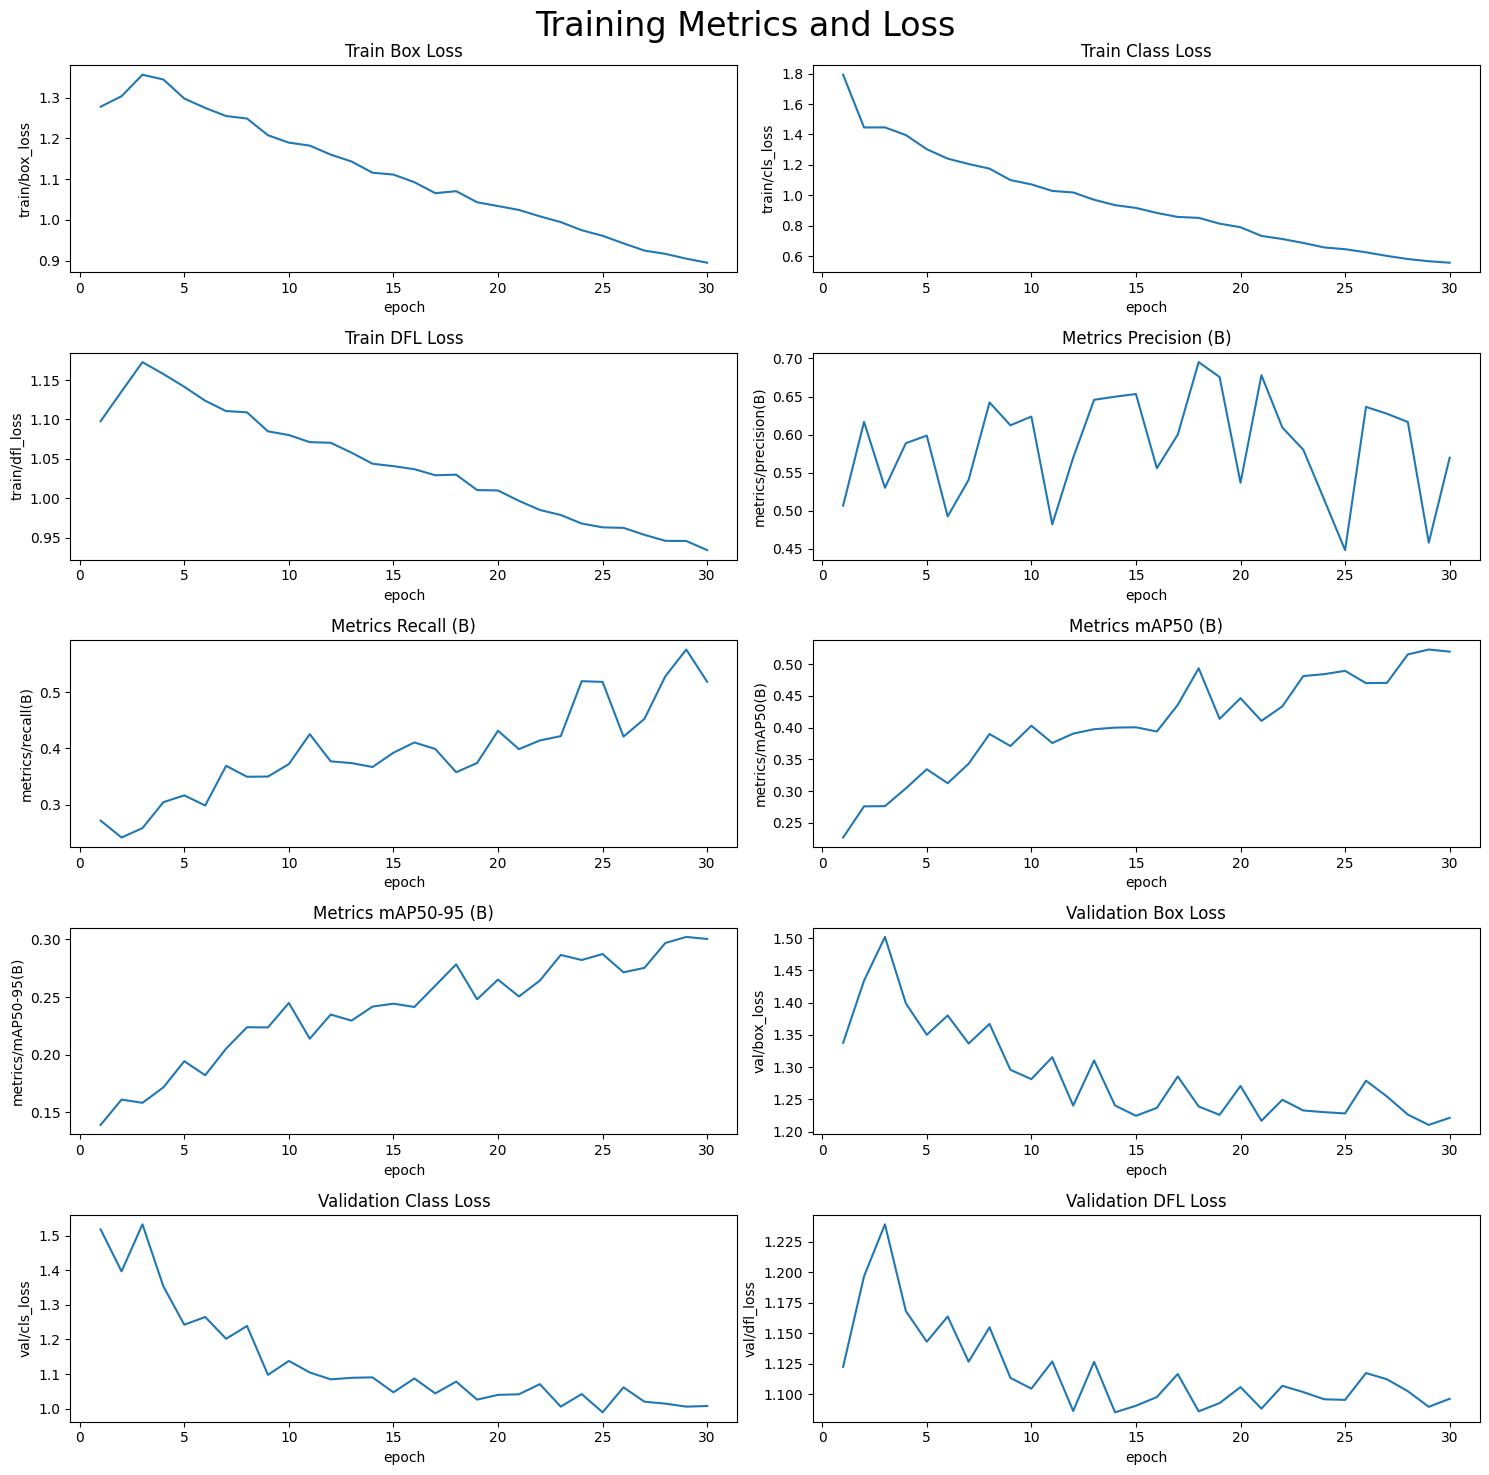

In [15]:
df = pd.read_csv('C:\\Users\\WGRACY.ai\\Desktop\\Ramya\\runs\\detect\\train14\\results.csv')


df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()


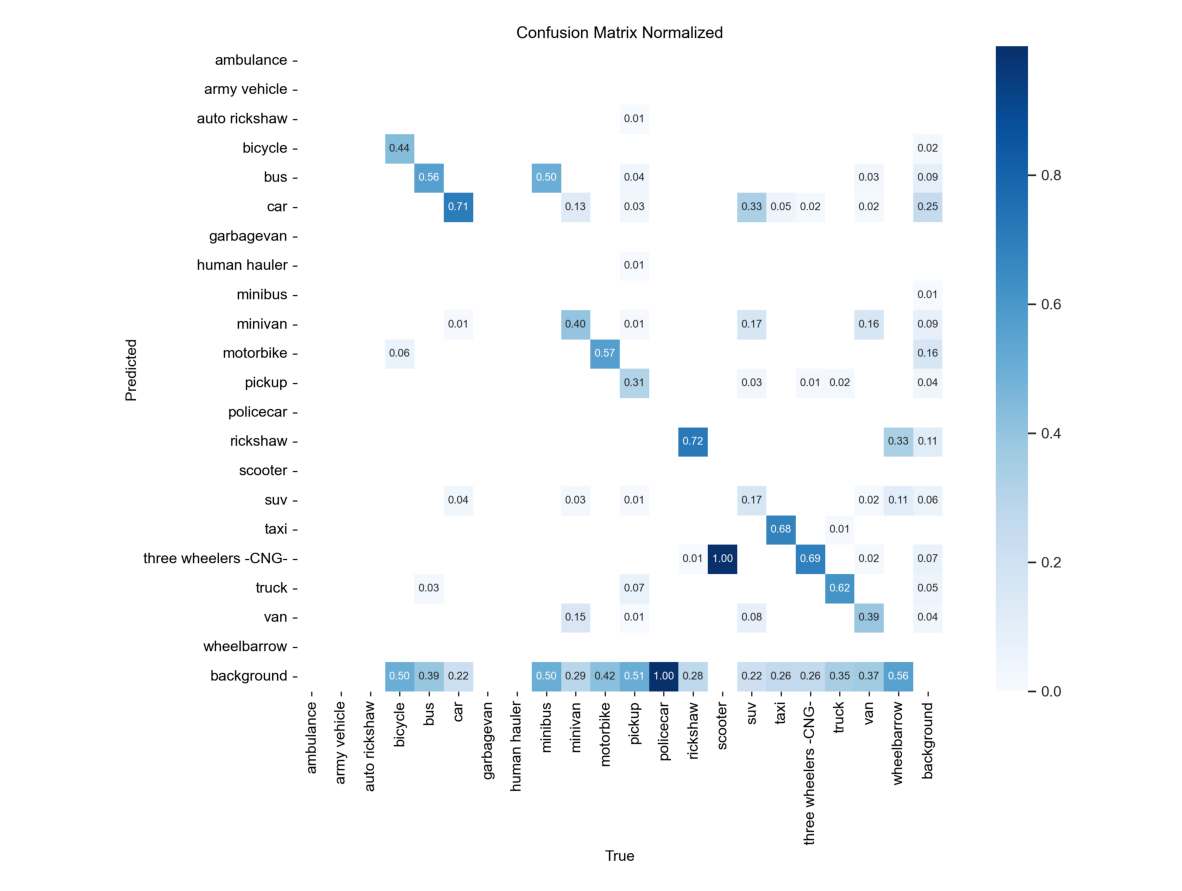

In [16]:
img = mpimg.imread('C:\\Users\\WGRACY.ai\\Desktop\\Ramya\\runs\\detect\\train14\\confusion_matrix_normalized.png')

fig, ax = plt.subplots(figsize = (15, 15))

ax.imshow(img)
ax.axis('off');

In [4]:
pip install ultralytics

     ---------------------------------------- 0.0/41.3 kB ? eta -:--:--
     ---------------------------------------- 41.3/41.3 kB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/865.6 kB ? eta -:--:--
   ----- ---------------------------------- 122.9/865.6 kB 3.6 MB/s eta 0:00:01
   ------------- -------------------------- 286.7/865.6 kB 4.4 MB/s eta 0:00:01
   ----------------------- ---------------- 501.8/865.6 kB 4.5 MB/s eta 0:00:01
   ------------------------------- -------- 686.1/865.6 kB 4.8 MB/s eta 0:00:01
   ---------------------------------------  860.2/865.6 kB 4.9 MB/s eta 0:00:01
   ---------------------------------------- 865.6/865.6 kB 4.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.8 MB 8.9 MB/s eta 0:00:05
    --------------------------------------- 0.5/38.8 MB 6.3 MB/s eta 0:00:07
    --------------------------------------- 0.7/38.8 MB 6.4 MB/s eta 0:00


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
model.save('model.pt')

In [ ]:
import cv2
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

cap = cv2.VideoCapture(0)  
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame.")
        break

    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    results = model.predict(rgb_frame)

    annotated_frame = results[0].plot()
    cv2.imshow('YOLO Webcam Feed', annotated_frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()



0: 480x640 1 person, 235.9ms
Speed: 77.7ms preprocess, 235.9ms inference, 6.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 189.8ms
Speed: 0.0ms preprocess, 189.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 175.3ms
Speed: 2.8ms preprocess, 175.3ms inference, 9.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 185.1ms
Speed: 4.0ms preprocess, 185.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 169.9ms
Speed: 1.4ms preprocess, 169.9ms inference, 15.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 169.4ms
Speed: 3.9ms preprocess, 169.4ms inference, 15.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 204.0ms
Speed: 0.0ms preprocess, 204.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 225.4ms
Speed: 1.2ms preprocess, 225.4ms inference, 3.5ms postprocess per image

In [9]:
!pip install ultralytics

     ---------------------------------------- 0.0/41.3 kB ? eta -:--:--
     ------------------ ------------------- 20.5/41.3 kB 330.3 kB/s eta 0:00:01
     -------------------------------------  41.0/41.3 kB 393.8 kB/s eta 0:00:01
     -------------------------------------- 41.3/41.3 kB 334.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/865.6 kB ? eta -:--:--
   -- ------------------------------------- 61.4/865.6 kB 1.7 MB/s eta 0:00:01
   -------- ------------------------------- 174.1/865.6 kB 2.6 MB/s eta 0:00:01
   -------------------- ------------------- 450.6/865.6 kB 3.5 MB/s eta 0:00:01
   -------------------------------- ------- 696.3/865.6 kB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 865.6/865.6 kB 4.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.8 MB 6.3 MB/s eta 0:00:07
    --------------------------------------- 0.6/38.8 MB 7.0 MB/s eta 0: